<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loss-Functions" data-toc-modified-id="Loss-Functions-1">Loss Functions</a></span><ul class="toc-item"><li><span><a href="#Our-First-Loss-Function:-Mean-Squared-Error" data-toc-modified-id="Our-First-Loss-Function:-Mean-Squared-Error-1.1">Our First Loss Function: Mean Squared Error</a></span></li><li><span><a href="#A-Shorthand" data-toc-modified-id="A-Shorthand-1.2">A Shorthand</a></span></li><li><span><a href="#Finding-the-Best-Value-of-$-\hat{\theta_0}-$" data-toc-modified-id="Finding-the-Best-Value-of-$-\hat{\theta_0}-$-1.3">Finding the Best Value of $ \hat{\theta_0} $</a></span></li><li><span><a href="#The-Minimizing-Value-of-the-Mean-Squared-Error" data-toc-modified-id="The-Minimizing-Value-of-the-Mean-Squared-Error-1.4">The Minimizing Value of the Mean Squared Error</a></span></li><li><span><a href="#Back-to-the-Original-Dataset" data-toc-modified-id="Back-to-the-Original-Dataset-1.5">Back to the Original Dataset</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.6">Summary</a></span></li></ul></li></ul></div>

In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

In [2]:
# HIDDEN
tips = sns.load_dataset('tips')
tips['pcttip'] = tips['tip'] / tips['total_bill'] * 100

## Loss Functions

For now, our model assumes that there is a single population tip percentage $ \theta_0 $. We are trying to estimate this parameter, and we use the variable $ \hat{\theta_0} $ to denote our estimate. Since our sample of tips is a random sample drawn from the population, we believe that using our sample to create an estimate $ \hat{\theta_0} $ will give a value close to $ \theta_0 $.

To precisely decide which value of $ \hat{\theta_0} $ is best, we need to define a *loss function*. A loss function is a mathematical function that takes in an estimate $ \hat{\theta_0} $ and the points in our dataset $y_1, y_2, \ldots, y_n$. It outputs a single number that we can use to choose between two different values of $ \hat{\theta_0} $. In mathematical notation, we want to create the function:

$$ L(\hat{\theta_0}, y_1, y_2, \ldots, y_n) =\ \ldots $$

By convention, the loss function outputs lower values for preferable values of $ \hat{\theta_0} $ and larger values for worse values of $ \hat{\theta_0} $. In the previous section, we compared $ \hat{\theta_0} = 10 $ and $ \hat{\theta_0} = 15 $.

/Users/captain/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


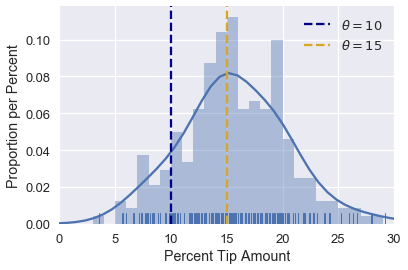

In [3]:
# HIDDEN
sns.distplot(tips['pcttip'], bins=np.arange(30), rug=True)

plt.axvline(x=10, c='darkblue', linestyle='--', label=r'$ \hat{\theta_0} = 10$')
plt.axvline(x=15, c='goldenrod', linestyle='--', label=r'$ \hat{\theta_0} = 15$')
plt.legend()

plt.xlim(0, 30)
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

Since $ \hat{\theta_0} = 15 $ falls closer to most of the points, our loss function should output a small value for $ \hat{\theta_0} = 15 $ and a larger value for $ \hat{\theta_0} = 10 $.

Let's use this intuition to create a loss function.

### Our First Loss Function: Mean Squared Error

We would like our choice of $ \hat{\theta_0} $ to fall close to the points in our dataset. Thus, we can define a loss function that outputs a larger value as $ \hat{\theta_0} $ gets further away from the points in the dataset. We start with a simple loss function called the *mean squared error*. Here's the idea:

1. We select a value of $ \hat{\theta_0} $.
2. For each value in our dataset, take the squared difference between the value and theta: $ (y_i - \hat{\theta_0})^2 $ . Squaring the difference in a simple way to convert negative differences into positive ones. We want to do this because if our point $ y_i = 14 $, $ \hat{\theta_0} = 10 $ and $ \hat{\theta_0} = 18 $ are equally far away from the point and are thus equally "bad".
3. To compute the final loss, take the average of each of the individual squared differences.

This gives us a final loss function of:


$$
\begin{aligned}
L(\hat{\theta_0}, y_1, y_2, \ldots, y_n)
&= \text{average}\left\{ (y_1 - \hat{\theta_0})^2, (y_2 - \hat{\theta_0})^2, \ldots, (y_n - \hat{\theta_0})^2 \right\} \\
&= \frac{1}{n} \left((y_1 - \hat{\theta_0})^2 + (y_2 - \hat{\theta_0})^2 + \ldots + (y_n - \hat{\theta_0})^2 \right) \\
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \hat{\theta_0})^2\\
\end{aligned}
$$

Creating a Python function to compute the loss is simple to do:

In [4]:
def mse(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

Let's see how this loss function behaves. Suppose we have a dataset only containing one point, $ y_1 = 14 $. We can try different values of $ \hat{\theta_0} $ and see what the loss function outputs for each value.

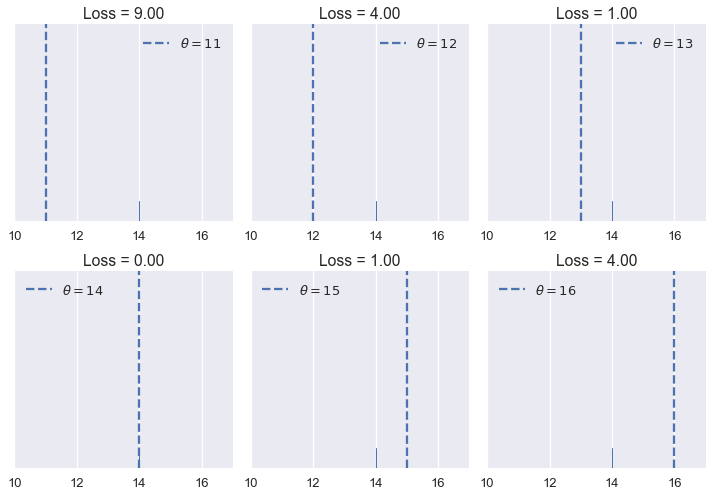

In [5]:
# HIDDEN
def try_thetas(thetas, y_vals, xlims, loss_fn=mse, figsize=(10, 7), cols=3):
    if not isinstance(y_vals, np.ndarray):
        y_vals = np.array(y_vals)
    rows = int(np.ceil(len(thetas) / cols))
    plt.figure(figsize=figsize)
    for i, theta in enumerate(thetas):
        ax = plt.subplot(rows, cols, i + 1)
        sns.rugplot(y_vals, height=0.1, ax=ax)
        plt.axvline(theta, linestyle='--',
                    label=rf'$ \hat{\theta_0} = {theta} $')
        plt.title(f'Loss = {loss_fn(theta, y_vals):.2f}')
        plt.xlim(*xlims)
        plt.yticks([])
        plt.legend()
    plt.tight_layout()

try_thetas(thetas=[11, 12, 13, 14, 15, 16],
           y_vals=[14], xlims=(10, 17))

You can also interactively try different values of $ \hat{\theta_0} $ below. You should understand why the loss for $ \hat{\theta_0} = 11 $ is many times higher than the loss for $ \hat{\theta_0} = 13 $.

In [6]:
# HIDDEN
def try_thetas_interact(theta, y_vals, xlims, loss_fn=mse):
    if not isinstance(y_vals, np.ndarray):
        y_vals = np.array(y_vals)
    plt.figure(figsize=(4, 3))
    sns.rugplot(y_vals, height=0.1)
    plt.axvline(theta, linestyle='--')
    plt.xlim(*xlims)
    plt.yticks([])
    print(f'Loss for theta = {theta}: {loss_fn(theta, y_vals):.2f}')

def mse_interact(theta, y_vals, xlims):
    plot = interactive(try_thetas_interact, theta=theta,
                       y_vals=fixed(y_vals), xlims=fixed(xlims),
                       loss_fn=fixed(mse))
    plot.children[-1].layout.height = '240px'
    return plot
    
mse_interact(theta=(11, 16, 0.5), y_vals=[14], xlims=(10, 17))

interactive(children=(FloatSlider(value=13.0, description='theta', max=16.0, min=11.0, step=0.5), Output(layout=Layout(height='240px'))), _dom_classes=('widget-interact',))

As we hoped, our loss is larger as $ \hat{\theta_0} $ is further away from our data and is smallest when $ \hat{\theta_0} $ falls exactly onto our data point. Let's now see how our mean squared error behaves when we have five points instead of one. Our data this time are: $ \{ 12.1, 12.8, 14.9, 16.3, 17.2 \} $.

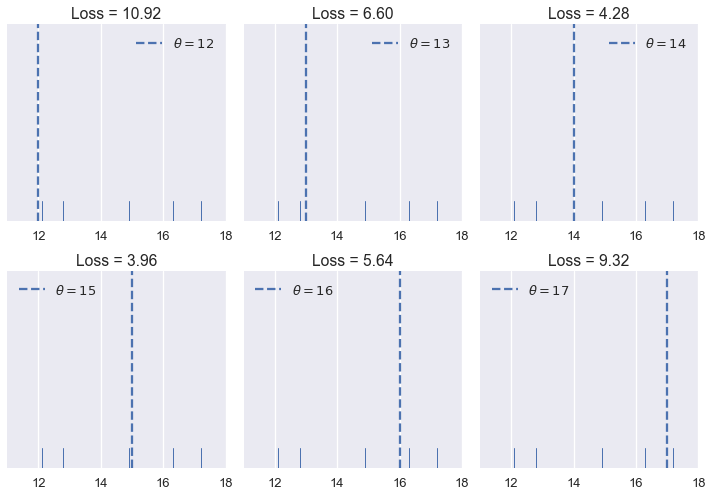

In [7]:
# HIDDEN
try_thetas(thetas=[12, 13, 14, 15, 16, 17],
           y_vals=[12.1, 12.8, 14.9, 16.3, 17.2],
           xlims=(11, 18))

Of the values of $ \hat{\theta_0} $ we tried $ \hat{\theta_0} = 15 $ has the lowest loss. However, a value of $ \hat{\theta_0} $ in between 14 and 15 might have an even lower loss than $ \hat{\theta_0} = 15 $. See if you can find a better value of $ \hat{\theta_0} $ using the interactive plot below.

(How might we know for certain whether we've found the best value of $ \hat{\theta_0} $? We will tackle this issue soon.)

In [8]:
# HIDDEN
mse_interact(theta=(12, 17, 0.2),
             y_vals=[12.1, 12.8, 14.9, 16.3, 17.2],
             xlims=(11, 18))

interactive(children=(FloatSlider(value=14.0, description='theta', max=17.0, min=12.0, step=0.2), Output(layout=Layout(height='240px'))), _dom_classes=('widget-interact',))

Mean squared error seems to be doing its job by penalizing values of $ \hat{\theta_0} $ that are far away from the center of the data. Let's now see what the loss function outputs on the original dataset of tip percents. For reference, the original distribution of tip percents is plotted below:

/Users/captain/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


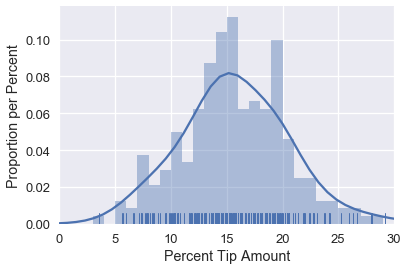

In [9]:
# HIDDEN
sns.distplot(tips['pcttip'], bins=np.arange(30), rug=True)
plt.xlim(0, 30)
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

Let's try some values of $ \hat{\theta_0} $.

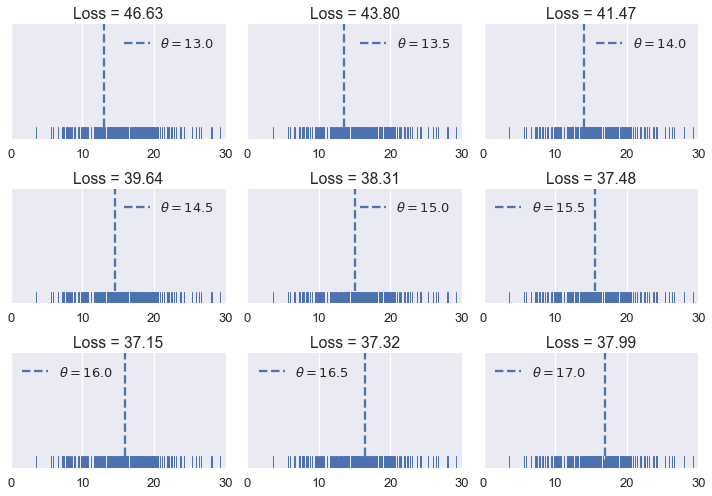

In [10]:
# HIDDEN
try_thetas(thetas=np.arange(13, 17.1, 0.5),
           y_vals=tips['pcttip'],
           xlims=(0, 30))

As before, we've created an interactive widget to test different values of $ \hat{\theta_0} $.

In [11]:
# HIDDEN
mse_interact(theta=(13, 17, 0.25),
             y_vals=tips['pcttip'],
             xlims=(0, 30))

interactive(children=(FloatSlider(value=15.0, description='theta', max=17.0, min=13.0, step=0.25), Output(layout=Layout(height='240px'))), _dom_classes=('widget-interact',))

It looks like the best value of $ \hat{\theta_0} $ that we've tried so far is 16.00. This is slightly above our original blind guess of 15% tip. It appears that our waiter gets a bit more tip than we originally thought.

### A Shorthand

We have defined our first loss function, the mean squared error (MSE). It computes high loss for values of $ \hat{\theta_0} $ that are further away from the center of the data. Mathematically, this loss function is defined as:

$$
\begin{aligned}
L(\hat{\theta_0}, y_1, y_2, \ldots, y_n)
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \hat{\theta_0})^2\\
\end{aligned}
$$

The loss function will compute different losses whenever we change either $ \hat{\theta_0} $ or $ y_1, y_2, \ldots, y_n $. We've seen this happen when we tried different values of $ \hat{\theta_0} $ and when we added new data points (changing $ y_1, y_2, \ldots, y_n $). 

As a shorthand, we can define the vector $ y = [ y_1, y_2, \ldots, y_n ] $. Then, we can write our MSE as:

$$
\begin{aligned}
L(\hat{\theta_0}, y)
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \hat{\theta_0})^2\\
\end{aligned}
$$

### Finding the Best Value of $ \hat{\theta_0} $

So far, we have found the best value of $ \hat{\theta_0} $ by simply trying out a bunch of values and then picking the one with the least loss. Although this method works decently well, we can find a better method by using the properties of our loss function.

For the time being, let's return to our example with five points: $ y = [ 12.1, 12.8, 14.9, 16.3, 17.2 ] $.

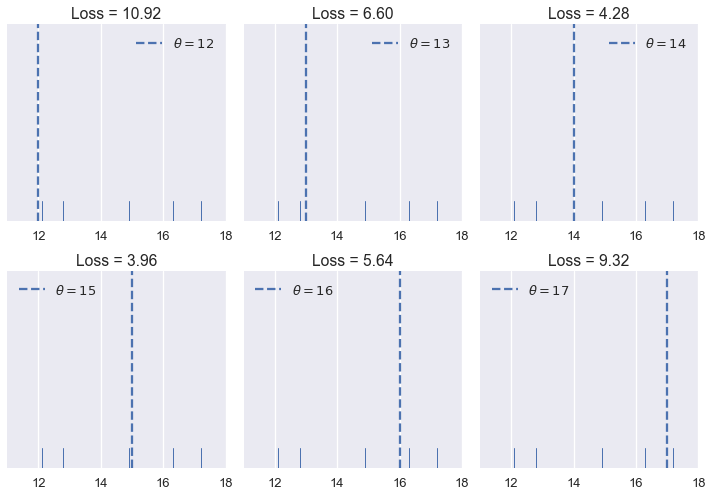

In [12]:
# HIDDEN
try_thetas(thetas=[12, 13, 14, 15, 16, 17],
           y_vals=[12.1, 12.8, 14.9, 16.3, 17.2],
           xlims=(11, 18))

In the plots above, we've used integer $ \hat{\theta_0} $ values in between 12 and 17. When we change $ \hat{\theta_0} $, the loss seems to start high (at 10.92), decrease until $ \hat{\theta_0} = 15 $, then increase again. We can see that the loss changes as $ \hat{\theta_0} $ changes, so let's make a plot comparing the loss to $ \hat{\theta_0} $ for each of the six $ \hat{\theta_0} $s we've tried.

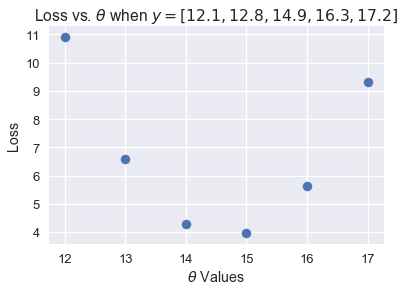

In [13]:
thetas = np.array([12, 13, 14, 15, 16, 17])
y_vals = np.array([12.1, 12.8, 14.9, 16.3, 17.2])
losses = [mse(theta, y_vals) for theta in thetas]

plt.scatter(thetas, losses)
plt.title(r'Loss vs. $ \hat{\theta_0} $ when $ y = [ 12.1, 12.8, 14.9, 16.3, 17.2 ] $')
plt.xlabel(r'$ \hat{\theta_0} $ Values')
plt.ylabel('Loss');

The scatter plot shows the downward, then upward trend that we noticed before. We can try more values of $ \hat{\theta_0} $ to see a complete curve that shows how the loss changes as $ \hat{\theta_0} $ changes.

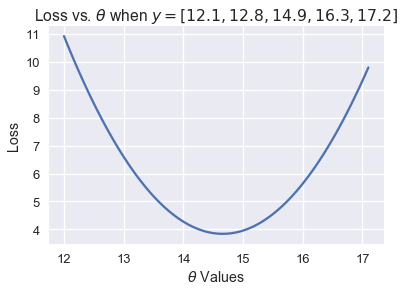

In [14]:
thetas = np.arange(12, 17.1, 0.05)
y_vals = np.array([12.1, 12.8, 14.9, 16.3, 17.2])
losses = [mse(theta, y_vals) for theta in thetas]

plt.plot(thetas, losses)
plt.title(r'Loss vs. $ \hat{\theta_0} $ when $ y = [ 12.1, 12.8, 14.9, 16.3, 17.2 ] $')
plt.xlabel(r'$ \hat{\theta_0} $ Values')
plt.ylabel('Loss');

The plot above shows that in fact, $ \hat{\theta_0} = 15$ was not the best choice; a $ \hat{\theta_0} $ of around 14.7 would have gotten a lower loss! We can use calculus to find that minimizing value of $ \hat{\theta_0} $ exactly. First, we start with our loss function:

$$
\begin{aligned}
L(\hat{\theta_0}, y)
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \hat{\theta_0})^2\\
\end{aligned}
$$

And plug in our points $ y = [ 12.1, 12.8, 14.9, 16.3, 17.2 ] $:

$$
\begin{aligned}
L(\hat{\theta_0}, y)
&= \frac{1}{n} \big((12.1 - \hat{\theta_0})^2 + (12.8 - \hat{\theta_0})^2 + (14.9 - \hat{\theta_0})^2 + (16.3 - \hat{\theta_0})^2 + (17.2 - \hat{\theta_0})^2 \big)\\
\end{aligned}
$$

To find the value of $ \hat{\theta_0} $ that minimizes this function, we compute the derivative with respect to $ \hat{\theta_0} $:

$$
\begin{aligned}
\frac{\partial}{\partial \hat{\theta_0}} L(\hat{\theta_0}, y)
&= \frac{1}{n} \big(-2(12.1 - \hat{\theta_0}) - 2(12.8 - \hat{\theta_0}) - 2(14.9 - \hat{\theta_0}) - 2(16.3 - \hat{\theta_0}) -2(17.2 - \hat{\theta_0}) \big)\\
&= - \frac{2}{n} \big((12.1 - \hat{\theta_0}) + (12.8 - \hat{\theta_0}) + (14.9 - \hat{\theta_0}) + (16.3 - \hat{\theta_0}) + (17.2 - \hat{\theta_0}) \big)
\end{aligned}
$$

Then, we find the value of $ \hat{\theta_0} $ where the derivative is zero:

$$
\begin{aligned}
0 &= - \frac{2}{n} \big((12.1 - \hat{\theta_0}) + (12.8 - \hat{\theta_0}) + (14.9 - \hat{\theta_0}) + (16.3 - \hat{\theta_0}) + (17.2 - \hat{\theta_0}) \big) \\
0 &= (12.1 - \hat{\theta_0}) + (12.8 - \hat{\theta_0}) + (14.9 - \hat{\theta_0}) + (16.3 - \hat{\theta_0}) + (17.2 - \hat{\theta_0}) \\
5 \hat{\theta_0} &= 12.1 + 12.8 + 14.9 + 16.3 + 17.2 \\
\hat{\theta_0} &= \frac{12.1 + 12.8 + 14.9 + 16.3 + 17.2}{5} \\
\hat{\theta_0} &= 14.66
\end{aligned}
$$

As expected, the value of $ \hat{\theta_0} $ that minimizes the loss is between 14 and 15.

Turn your attention to the second-to-last line of the simplification above:

$$ \hat{\theta_0} = \frac{12.1 + 12.8 + 14.9 + 16.3 + 17.2}{5} $$

Notice that this is a familiar expression: it is the average of the five data points. Could this be a pattern for all values of $ y $?

### The Minimizing Value of the Mean Squared Error

We have seen that different values of $ \hat{\theta_0} $ produce different losses when using mean squared error. The arithmetic above hints that the value of $ \hat{\theta_0} $ that minimizes the loss is the mean of all of the data points. To confirm this, we turn back to the definition of our loss function. Instead of plugging in points, we take the derivative with respect to $ \hat{\theta_0} $ of the loss function as-is:

$$
\begin{aligned}
L(\hat{\theta_0}, y)
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \hat{\theta_0})^2\\
\frac{\partial}{\partial \hat{\theta_0}} L(\hat{\theta_0}, y)
&= \frac{1}{n} \sum_{i = 1}^{n} -2(y_i - \hat{\theta_0}) \\
&= -\frac{2}{n} \sum_{i = 1}^{n} (y_i - \hat{\theta_0}) \\
\end{aligned}
$$

Notice that we have left the variables $ y_i $ untouched. We are no longer working with the previous example dataset of five points; this equation can be used with any dataset with any number of points.

Now, we set the derivative equal to zero and solve for $ \hat{\theta_0} $ to find the minimizing value of $ \hat{\theta_0} $ as before:

$$
\begin{aligned}
-\frac{2}{n} \sum_{i = 1}^{n} (y_i - \hat{\theta_0}) &= 0 \\
\sum_{i = 1}^{n} (y_i - \hat{\theta_0}) &= 0 \\
\sum_{i = 1}^{n} y_i - \sum_{i = 1}^{n} \hat{\theta_0} &= 0 \\
\sum_{i = 1}^{n} \hat{\theta_0} &= \sum_{i = 1}^{n} y_i \\
n \cdot \hat{\theta_0} &= y_1 + \ldots + y_n \\
\hat{\theta_0} &= \frac{y_1 + \ldots + y_n}{n} \\
\hat{\theta_0} &= \text{mean} (y)
\end{aligned}
$$

Lo and behold, we see that there is a single value of $ \hat{\theta_0} $ that gives the least MSE no matter what the dataset is. For the mean squared error, we can set $ \hat{\theta_0} $ equal to the mean of the dataset and be confident knowing that we have minimized the loss.

### Back to the Original Dataset

We no longer have to test out different values of $ \hat{\theta_0} $ as we did before. We can compute the mean tip percentage in one go:

In [15]:
np.mean(tips['pcttip'])

16.08025817225047

/Users/captain/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


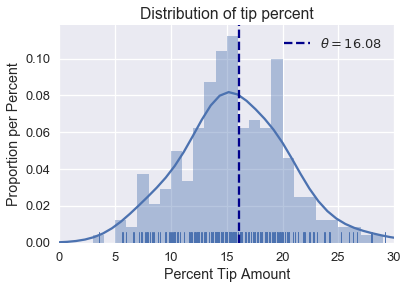

In [16]:
# HIDDEN
sns.distplot(tips['pcttip'], bins=np.arange(30), rug=True)

plt.axvline(x=16.08, c='darkblue', linestyle='--', label=r'$ \hat{\theta_0} = 16.08$')
plt.legend()

plt.xlim(0, 30)
plt.title('Distribution of tip percent')
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

### Summary

First, we restricted our model to only make a single number as its prediction for all tables. Next, we assume that the waiter's dataset of tips is similar to the population distribution of tip percentages. If this assumption holds, predicting $ 16.08\% $ will give us the most accurate predictions that we can given our data.

To be more precise, we say that the model is accurate if it minimizes the squared difference between the predictions and the actual values.

Although our model is simple, it illustrates concepts that we'll see over and over again. Future chapters will introduce complicated models. Still, we will discuss each model's assumptions, define loss functions, and find the model that minimizes the loss. It is very helpful to understand this process for simple models before attempting to understand complex ones.